## 主成分分析についてまとめてください。（自分が理解できていることを採点者に伝えてください。）

主成分分析(principal component analysis:PCA)とは、与えられたデータの傾向から機械学習によって自動的に特徴量を見つけ出し、その特徴をよく表す低次元データへと次元圧縮をする手法の一つです。  


## 主成分分析について素人にも分かるように簡潔に説明してください。

肥満度を測るBMIという指標で説明します。
BMIは（体重）$\div$（身長$）^2$という計算式で導出されるものですが、元のデータは（身長、体重）という２成分を持つデータであったのに対し、BMIはただ１成分の数値となっています。これを次元の圧縮といい、その結果、BMIは情報を削ぎ落としたにも関わらず、肥満度という特徴を表すのに十分な機能を持っています。このようにデータに適切な処置を行えば、情報量の削減と特徴の抽出とを同時に行い、人間がデータの関係性を把握しやすくすることができるようになります。以上のようなデータに行う処置が主成分分析です。



## 主成分分析について数式を用いて説明してください。

 二つの変量x、yを持つサンプルデータ（点）が多数あるとする。例えば、x軸が国語の点数、y軸が数学の点数で、点は一人の生徒を表す場合等である。
一人一人の違いを見るとき、x軸の国語の側から見るのと（国語の点数を比較する）、y軸の数学の側から見る事が出来る。
しかし二つの方向から眺めて一眼で違いを判断することは難しい。またサンプルデータの次元が増えればなおさらのことである。もし生徒の散らばり方の情報を最も保持した新しい一つ次元を減らした軸から見れば、一人一人の違い（各点の離れ方）は一目瞭然である。
主成分分析は、この様な線を引く。それは座標軸の回転と考える事も出来る。  
このように主成分分析とは、新たな座標軸における各点の座標が最もばらけるように（違いが分かるように）、低次元の座標軸を引くことである。そのような座標軸を引くことを計算で求める。
ここで新しい座標軸の単位ベクトルを  $(a,b)=(cosθ,sinθ)$ とする。
まず、元の座標でデータの中心化を行い分散を求める。中心化とは、其々の軸の平均値に原点を移動する。分散とは、各データの値$(x_{1},x_{2},・・・ )$から全データの平均値$\overline{x}$ を引いた値（偏）差の2乗の総和をデータの個数で割ったもの。従って、中心化させる事で各データの値がそのまま偏差となって計算が簡単になる。偏差の2乗を取るのは、原点を挟んでプラスとマイナスがあるので、相殺されるのを防ぐためである。
そこで、ある点$k$(中心化後の座標を$x_{k}、y_{k}$とする）と新しい座標軸の単位ベクトルと内積を$D_{k}$とすると、$D_{k}＝ax_{k}＋by_{k} (a=cosθ、b=sinθ)$となる。その2乗は以下のようになる。
$$
(D_{k})^2＝(ax_{k}＋by_{k})^2 = a^2x_{k}^2+b^2y_{k}^2+2abx_{k}y_{k}
$$
分散（var）を求めるには、全てのデータの２乗の和を求めてデータの個数$（n）$で割ればいい。以下のように式が展開されるが、$a^2,b^2$は$(a,b)=(cosθ,sinθ)$ で定数であるため括り出せる。

$$
var=\frac{1}{n}\sum_{k=1}^{n}D_{k}^2 =\frac{1}{n}\sum_{k=1}^{n}(ax_{k}+by_{k})^2=\frac{1}{n}\sum_{k=1}^{n}(a^2x_{k}^2+b^2y_{k}+2abx_{k}y_{k})
\\=a^2\frac{1}{n}\sum_{k=1}^{n}x_{k}^2+b^2\frac{1}{n}\sum_{k=1}^{n}y_{k}^2+2ab\frac{1}{n}\sum_{k=1}^{n}x_{k}y_{k} ・・・(A)
$$
(A)式のa、b以外のところはそれぞれ、回転前の座標軸のx座標の分散（中心化後なので平均0の分散）、y座標の分散、x座標y座標の共分散となっている。これを以下のように定める。
$$
\frac{1}{n}\sum_{k=1}^{n}x_{k}^2 => S_{x} : x座標の分散 \\
\frac{1}{n}\sum_{k=1}^{n}y_{k}^2=> S_{y} : y座標の分散  \\
\frac{1}{n}\sum_{k=1}^{n}x_{k}y_{k} => S_{xy} : x,y座標共分散\\
$$
また、$a＝cosθ、b＝sinθ$から、$a^2＋b^2＝1$の制約もある。
この制約の中で、分散varの最大値を求めるために、ラグランジュの未定係数法を用いる。
この方法によれば、以下のように関数を作り、Gの最大値を与える$a、b、λ$を求めれば、Fの最大値を与える$a、b$も求まることが分かっている。

$$
F(a,b)=S_{x}a^2+S_{y}b^2+S_{xy}2ab\\
C(a,b)=a^2+b^2-1=0\\
G(a,b,λ) = F(a,b)-λC(a,b)\\
$$
これを解くには、$G$を$a、b、λ$で其々偏微分して、＝0と置いた連立方程式を作る。

$$
G(a,b,λ) = F(a,b)-\lambda C(a,b)=S_{x}a^2+S_{y}b^2+S_{xy}2ab-λ(a^2+b^2-1)\\
\frac{∂G}{∂a}=2S_{x}a+2S_{xy}b-2λa=0\\
\frac{∂G}{∂b}=2S_{y}b+2S_{xy}a-2λb=0\\
\frac{∂G}{∂λ}=-a^2-b^2+1=0
$$

上記の偏微分した式をまとめると
$$
S_{x}a+S_{xy}b=λa　・・・(1)  \\ 
S_{y}b+S_{xy}a=λb ・・・(2) \\
a^2+b^2=1\\
$$
$$
{\begin{pmatrix}
S_{x} &S_{xy} \\
S_{xy} & S_{y} 
\end{pmatrix}
\begin{pmatrix}
a \\
b \\
\end{pmatrix}=
}
λ
\begin{pmatrix}
a \\
b \\
\end{pmatrix}
$$
この式は共分散行列
\begin{pmatrix}
S_{x} &S_{xy} \\
S_{xy} & S_{y} 
\end{pmatrix}
の固有方程式になっている。
以上から、λは共分散行列の固有値、(a、b)はその固有ベクトルになっているのでそれを求めればよい。
固有ベクトルは通常、a、bの比しか求められないが、ここでは$a^2＋b^2＝1$の制約があるので、各固有値に対する$a、b$は一意に決まる。
    
分散varを最大化するa、b、λはラグランジュの未定係数法により、以下の(1)(2)のように求められた。(1)×a＋(2)×bと置くと、これも＝0となる。
これを整理して、$a^2＋b^2＝1$の条件を使うと
$$
S_{x}a+S_{xy}b-λa=0　・・・(1)\\
S_{y}b+S_{xy}a-λb=0　 ・・・(2)\\
$$

$(1) \times a+(2) \times b$は
$$
S_{x}a^2+S_{y}b^2+2S_{xy}ab-λ(a^2+b^2)=0\\
\Leftrightarrow 
S_{x}a^2+S_{y}b^2+2S_{xy}ab=λ\\
$$
となり、左辺は最大化を目指した主成分得点の分散var（A）に他ならず、varの値は固有値λそのものであることを示してる。このように主成分分析は固有値問題に帰結することがわかる。
各固有値の大きさが、その軸の主成分得点の分散の大きさを表す。それが大きいほど、全体のデータの特徴を、一方向からよく眺められることになり主成分分析の目的に合致する。大きい固有値の固有ベクトルを第１主成分、二番めの大きさの固有値の固有ベクトルを第２主成分と呼ぶ。
対称行列の固有ベクトルは互いに直交する。共分散行列は対称行列なので、その固有ベクトルの第１主成分と第２主成分は直交する。

## 主成分分析をPythonで実装してください

ライブラリの固有値
[ 489786.97565762  108894.75994226]
ライブラリ固有ベクトル
[[ 0.8497074   0.23978088  0.4695769 ]
 [-0.42326275  0.84127071  0.33632161]]
ライブラリ分散共分散行列
[[ 373998.22222222   62344.44444444  177686.66666667]
 [  62344.44444444  107276.54320988   82508.64197531]
 [ 177686.66666667   82508.64197531  126128.39506173]]
ライブラリ累積寄与率
[ 0.80636224  0.17927921]
###########
スクラッチ分散共分散行列
[[ 420748.           70137.5         199897.5       ]
 [  70137.5         120686.11111111   92822.22222222]
 [ 199897.5          92822.22222222  141894.44444444]]
スクラッチ固有値
[ 551010.34761483  122506.60493504    9811.60300569]
スクラッチ固有ベクトル
[[-0.8497074  -0.42326275 -0.3143978 ]
 [-0.23978088  0.84127071 -0.48452938]
 [-0.4695769   0.33632161  0.81632426]]
スクラッチ第一主成分の寄与率
0.806362244246


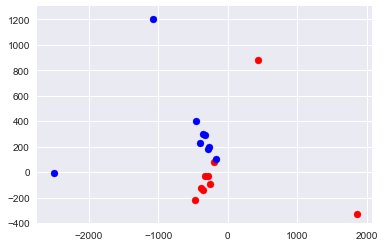

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

# 主成分分析をするライブラリ
from sklearn.decomposition import PCA

def pca_scrach(data):
    '''
    自作の主成分分析を行う関数
    n次元から2次元のデータに圧縮する。
    引数：元データ　（n次元）行（データ数）列の行列
    返り値：２次元に圧縮されたデータの２行（データ数）列の行列
    '''
    # データの偏差を求める
    data_deviation = np.array([row - np.mean(row) for row in data.transpose()]).transpose()
    
    # 分散共分散行列を求める
    cov_array = np.cov(data_deviation.T)

    '''
    cov関数を使用しないなら下記のようになる
        X_bar = np.array([row - np.mean(row)\
                                                   for row in X.transpose()]).transpose()
        cov_array = np.dot(X_bar.T, X_bar) / (X.shape[0] - 1)
    '''
    
    print("スクラッチ分散共分散行列")
    print(cov_array)
    # 上の分散共分散行列を用いて固有値、固有ベクトルを求める
    lam,eigen_vecter = np.linalg.eig(cov_array)
    print("スクラッチ")
    print(lam)
    print('スクラッチ固有ベクトル')
    print(eigen_vecter)
    
    # np.linalg.eig関数では固有値順にソートされていないため
    #　固有ベクトルを固有値の大きい順に並べ換える
    lam_index = [n for n in range(len(lam))]
    for i in range(len(lam)):
        for j in range(i + 1,len(lam)):
            if lam[i] < kam[j]:
                lam[i],lam[j] = lam[j],lam[i]
                lam_index[i],lam_index[j] = lam_index[j],lam_index[i]
                
    print('スクラッチ第一主成分の寄与率')
    print(lam[0] / sum(lam))
    
    # 各データの第一主成分の値を計算
    first_axes = np.dot(eigen_vecter[:, lam_index[0]].T,data.T)
    # 各データの第二主成分の値を計算
    second_axes = np.dot(eigen_vecter[:, lam_index[1]].T,data.T)
    
    return np.array([first_axes, second_axes])

# PCAを使用したお手本コード
#[pythonのコードのスター総数、Javaのコードのスターの総数、年収]
X = np.array([[70,30,700],[32,60,480],[32,20,300],[20,120,600],
                          [40,120,630],[40,30,520],[300,1100,1200],[2000,400,1500],[40,180,800]])
# n_componentsで削減先の次元を２次元に指定
pca = PCA(n_components=2)
pca.fit(X) # 主成分分析を実行


#データの確認
print('ライブラリの固有値')
print(pca.explained_variance_)
print('ライブラリ固有ベクトル')
print(pca.components_)
print('ライブラリ分散共分散行列')
print(pca.get_covariance())
print('ライブラリ累積寄与率')
print(pca.explained_variance_ratio_)

print('###########')

# 次元削減をXに適用する。
pca_point = pca.transform(X)
    

# スクラッチ関数で圧縮したデータも用意する
pca_point2 = pca_scratch(X)

#スクラッチ関数で作った圧縮データは青でライブラリ関数で作った圧縮データは赤でプロットして結果を確認する
plt.scatter(*pca_point.T, color = 'red')
plt.scatter(pca_point2[0],pca_point2[1], color = 'blue')
#グラフを表示する
plt.show()